<div style="text-align: center; color: #000000; font-family: Babas; font-size: 2em;">SINCLINAL EL CARMELO - DIAPIRO</div>
<div style="text-align: left; color: #000000; font-family: Babas; font-size: 1.5em;">DESCRIPCIÓN</div>
<div style="text-align: left; color: #000000; font-family: Babas; font-size: 1em; border-bottom: 1px solid white;">Información obtenida de un corte geológico NW SE, ubicado en la plancha 39 al sur de la cuenca Sinú-san jacinto cerca a la quebrada Pajillal. La parte del corte usada para el modelo muestra muestra un gran sinclinal con pequeños pliegues que ha sido afectado por un diapiro de lodo afectando a las Formaciones Arenas Monas(N1N2am), El pantano(N1mp), Pajuil - Miembro Loma Verde(N1N2palv),  Formación Pajuil - Miembro Cerro Verdinal(N1N2pacv) y Floresanto (E3N1f).  </div>

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import gempy as gp 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import pyvista
import pickle

In [16]:
# load the model to check its ok
modelo = pickle.load(open("diapiro_SSJ.p", "rb"))

In [12]:
gp.plot_3d(modelo)
#plt.savefig('modelo3d_diapiro_SSJ.png', dpi=300, bbox_inches='tight')

# GEOSTATISCAL METHODS FOR GEOPHYSICAL PROPERTIES INTERPOLATION

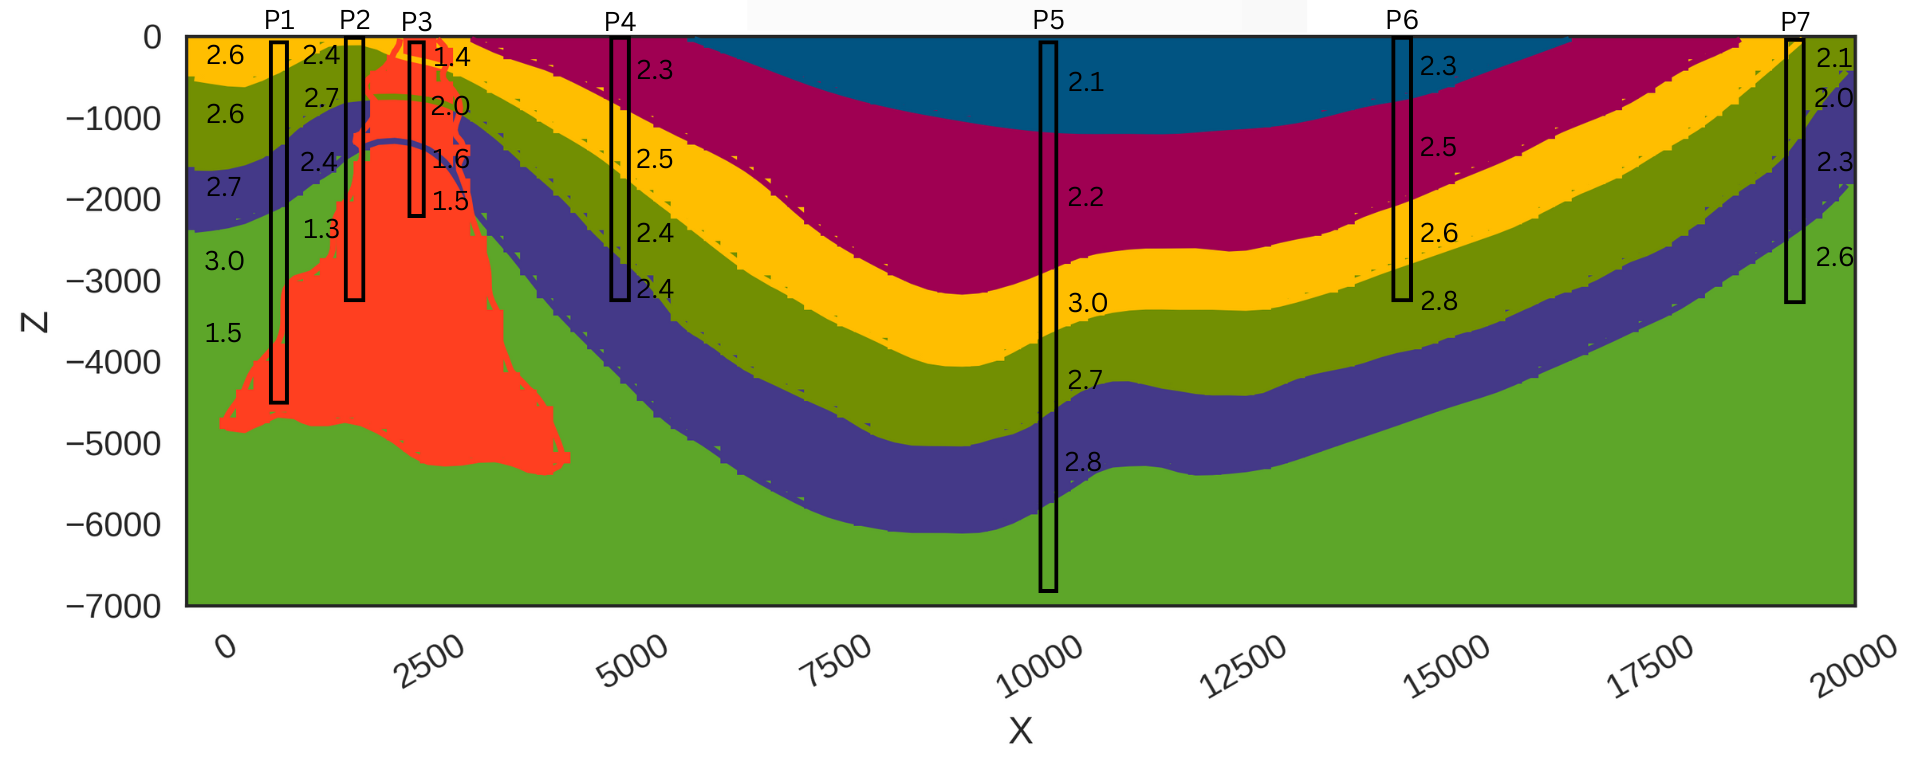

In [17]:
from IPython.display import Image as IPImage, display
from PIL import Image

image = Image.open('model_wells.png')
display(IPImage(filename='model_wells.png'))

In [18]:
from gempy.assets import kriging

In [19]:
np.random.seed(5555)

In [24]:
# 1) Creating domain
# ------------------
# 
# Let us assume we have a couple of measurements in a domain of interest
# within our model. In our case the unit of interest is the central rock
# layer (rock1). In the kriging module we can define the domain by
# handing over a number of surfaces by id - in this case the id of rock1
# is 2. In addition we define four input data points in cond_data, each
# defined by x,y,z coordinate and a measurement value.
# 

In [20]:
# conditioning data (data measured at locations)
# asumiendo una interpolación de datos de densidad

cond_data = np.array([
    #pozo 1
    [1000, 0, -500, 2.6], [1000, 0, -1000, 2.6], [1000, 0, -2000, 2.7], [1000, 0, -3000, 3.0], [1000, 0, -4500, 1.5],
    #pozo 2
    [2000, 0, -10, 2.4], [2000, 0, -1000, 2.7], [2000, 0, -1500, 2.4], [2000, 0, -3000, 1.3],
    #pozo 3
    [2500, 0, -50, 1.4], [2500, 0, -1000, 2.5], [2500, 0, -2000, 1.6], [2500, 0, -2500, 1.5],
    #pozo 4
    [4800, 0, -200, 2.3], [4800, 0, -1000, 2.5], [4800, 0, -2500, 2.4], [4800, 0, -3000, 2.4],
    #pozo 5
    [10000, 0, -350, 2.1], [10000, 0, -2000, 2.2], [10000, 0, -3000, 3.0], [10000, 0, -4000, 2.7], 
    [10000, 0, -5000, 2.8], [10000, 0, -6500, 3.2],
    #pozo 6
    [14500, 0, -500, 2.3], [14500, 0, -1500, 2.5], [14500, 0, -2500,  2.6], [14500, 0, -3100, 2.8],
    #pozo 7
    [19500, 0, -20, 2.1], [19500, 0, -1500, 2.0], [19500, 0, -3000, 2.3], [19500, 0, -3300, 2.6]
])

In [21]:
sol = gp.compute_model(modelo)

In [22]:
# %% 
# creating a domain object from the gempy solution, a defined domain conditioning data
domain = kriging.domain(model=sol, domain=[1], data=cond_data)

In [23]:
domain

In [24]:
cond_data[:, 3]

array([2.6, 2.6, 2.7, 3. , 1.5, 2.4, 2.7, 2.4, 1.3, 1.4, 2.5, 1.6, 1.5,
       2.3, 2.5, 2.4, 2.4, 2.1, 2.2, 3. , 2.7, 2.8, 3.2, 2.3, 2.5, 2.6,
       2.8, 2.1, 2. , 2.3, 2.6])

In [25]:
# %%
# 2) Creating a variogram model
# -----------------------------

variogram_model = kriging.variogram_model(theoretical_model='exponential',
                                          range_=200, sill=np.var(cond_data[:, 3]))

In [27]:
np.var(cond_data[:, 3])

0.22441207075962544

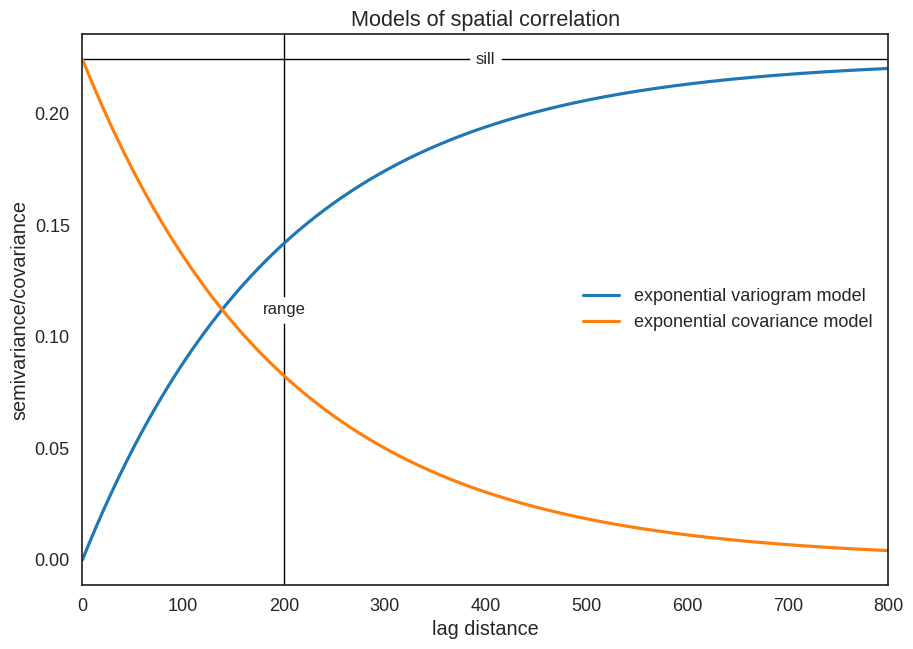

In [26]:
variogram_model.plot(type_='both', show_parameters=True)
plt.savefig('variograma.png', dpi=300, bbox_inches='tight')
plt.show()

In [96]:
# 
# 3) Kriging interpolation
# ------------------------
# In the following we define an object called kriging_model and set all
# input parameters. Finally we generate the kriged field.
# 

solution = kriging.create_kriged_field(domain, variogram_model)

In [97]:
# The result of our calculation is saved in the following dataframe,
# containing an estimated value and the kriging variance for each point in
# the grid:

solution.results_df.head()

,X,Y,Z,estimated value,estimation variance
0,422.5,25.0,-4585.0,2.310860,0.230632
1,422.5,25.0,-4515.0,2.309499,0.230566
2,422.5,25.0,-4445.0,2.310141,0.230590
3,422.5,25.0,-4375.0,2.312699,0.230699
4,422.5,25.0,-4305.0,2.316799,0.230866


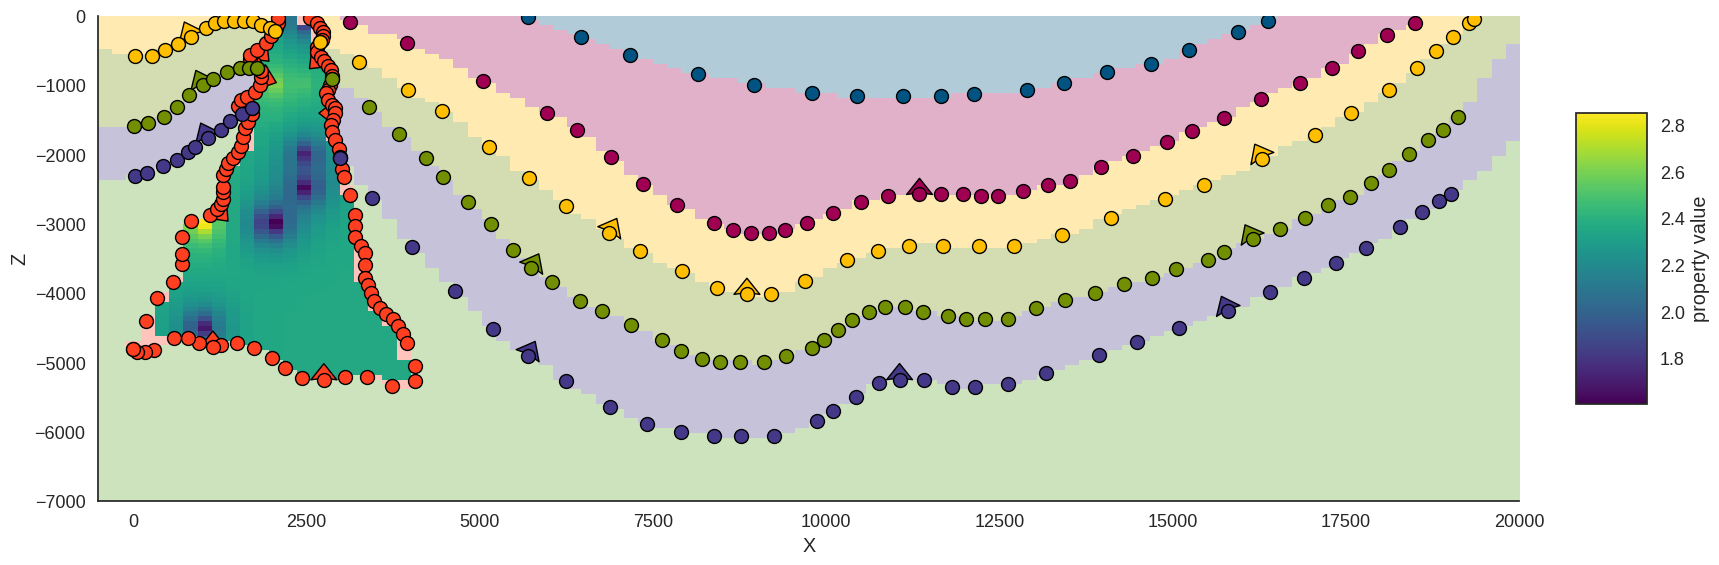

In [98]:
# 
# It is also possible to plot the results in cross section similar to the
# way gempy models are plotted.

solution.plot_results(geo_data=modelo, prop='val', contour=False,
                      direction='y', cell_number=0, alpha=0.7,
                      show_data=False, legend=True)

plt.savefig('capa7.png', dpi=300, bbox_inches='tight')
plt.show()

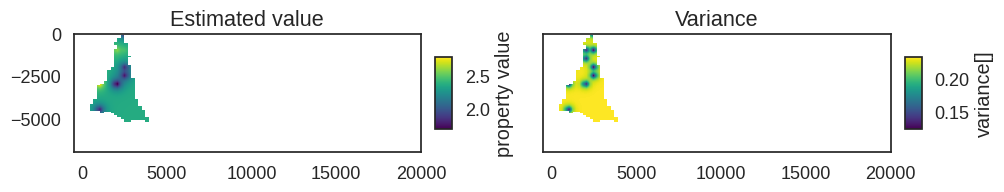

In [99]:
# %% 
solution.plot_results(geo_data=modelo, prop='both', contour=False,
                      direction='y', cell_number=1, alpha=0,
                      interpolation='bilinear', show_data=False)

plt.savefig('capa7_varianza.png', dpi=300, bbox_inches='tight')

plt.show()